# Project Strongest - 初期データ分析 (EDA)

このNotebookでは、`JraVanDataLoader` を介してロードされたデータセットの初期概要を確認します。

In [ ]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# notebooksディレクトリから実行している場合、srcをパスに追加
if 'src' not in sys.path:
    sys.path.append(os.path.join(os.getcwd(), '../src'))

from preprocessing.loader import JraVanDataLoader

%matplotlib inline
import japanize_matplotlib 
import seaborn as sns
# japanize_matplotlibをインポートすると 'IPAexGothic' が使えるようになります
sns.set(font='IPAexGothic')

## 1. データのロード
`JraVanDataLoader` を使用してデータをロードします。PostgreSQLデータベースに接続し、レースおよび結果情報を取得します。

In [2]:
try:
    loader = JraVanDataLoader()
    # EDA用に10万件をロードします。必要に応じてlimitを調整してください。
    df = loader.load(limit=100000)
    print(f"{len(df)} 行のデータを正常にロードしました")
except Exception as e:
    print(f"データのロード中にエラーが発生しました: {e}")
    print("Dockerコンテナ内で実行しているか、DB接続設定が正しいことを確認してください。")

重複データを削除しました: 100000 -> 99708 件 (削除: 292 件)


99708 行のデータを正常にロードしました


In [3]:
df.head()

,race_id,date,venue,race_number,distance,surface,weather,state,title,horse_id,...,sire_id,mare_id,pass_1,pass_2,pass_3,pass_4,rank,time,weight_diff,passing_rank
0,195406050105,1954-10-23,06,5,1000,芝,曇,良,,1952100309,...,0000000000,0000000000,00,00,00,00,1,61.2,0,00-00-00-00
1,195406050808,1954-11-07,06,8,1100,芝,晴,良,三歳馬優勝競走,1952100309,...,0000000000,0000000000,00,00,00,00,1,65.8,0,00-00-00-00
2,195406060102,1954-12-04,06,2,1100,芝,晴,稍重,,1952100309,...,0000000000,0000000000,00,00,00,00,1,67.4,0,00-00-00-00
3,195406060410,1954-12-12,06,10,1100,芝,晴,稍重,朝日盃三歳ステークス競走,1952100309,...,0000000000,0000000000,00,00,00,00,1,67.6,0,00-00-00-00
4,195506010401,1955-01-08,06,1,1100,芝,晴,良,,1952100309,...,0000000000,0000000000,00,00,00,00,1,66.4,0,00-00-00-00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99708 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   race_id           99708 non-null  object 
 1   date              99708 non-null  object 
 2   venue             99708 non-null  object 
 3   race_number       99708 non-null  int64  
 4   distance          99708 non-null  int64  
 5   surface           99708 non-null  object 
 6   weather           99708 non-null  object 
 7   state             99708 non-null  object 
 8   title             99708 non-null  object 
 9   horse_id          99708 non-null  object 
 10  jockey_id         99708 non-null  object 
 11  trainer_id        99708 non-null  object 
 12  frame_number      99708 non-null  int64  
 13  horse_number      99708 non-null  int64  
 14  rank_str          99708 non-null  object 
 15  raw_time          99708 non-null  object 
 16  last_3f           99708 non-null  object 
 17

## 2. 基本統計量

In [5]:
df[['odds', 'popularity', 'weight', 'age', 'distance']].describe()

,odds,popularity,weight,distance
count,99708.000000,99708.000000,99646.000000,99708.000000
mean,27.443843,6.395675,455.152781,1660.502567
std,36.630930,3.816196,39.545652,440.720092
min,0.000000,0.000000,0.000000,800.000000
25%,6.400000,3.000000,436.000000,1200.000000
50%,14.100000,6.000000,456.000000,1700.000000
75%,33.400000,9.000000,476.000000,1800.000000
max,727.000000,24.000000,999.000000,4100.000000


## 3. 可視化

### 3.1 着順の分布
着順データの偏りや欠損がないか確認します。

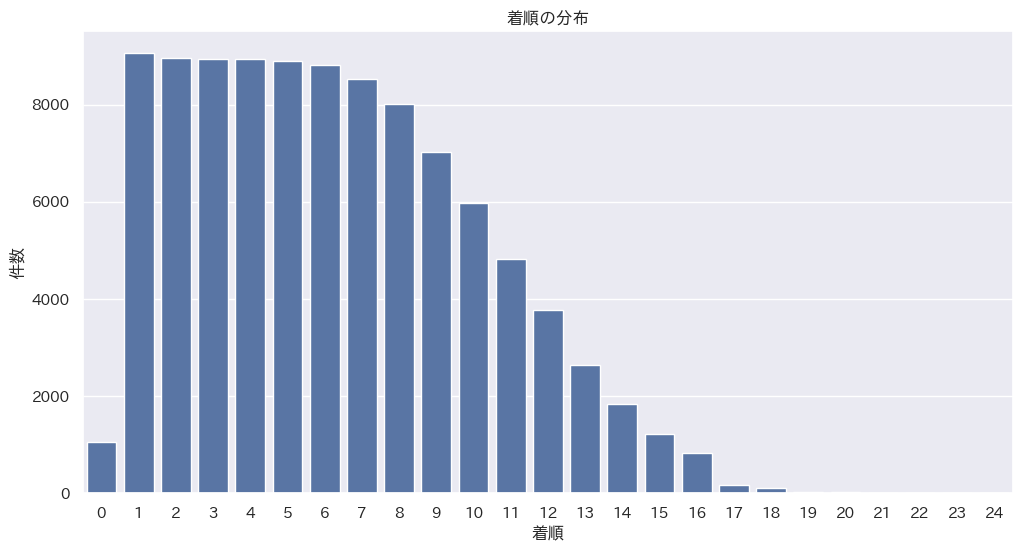

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rank')
plt.title('着順の分布')
plt.xlabel('着順')
plt.ylabel('件数')
plt.show()

### 3.2 単勝オッズの分布
単勝オッズの分布を可視化します。通常はべき乗則に従います。

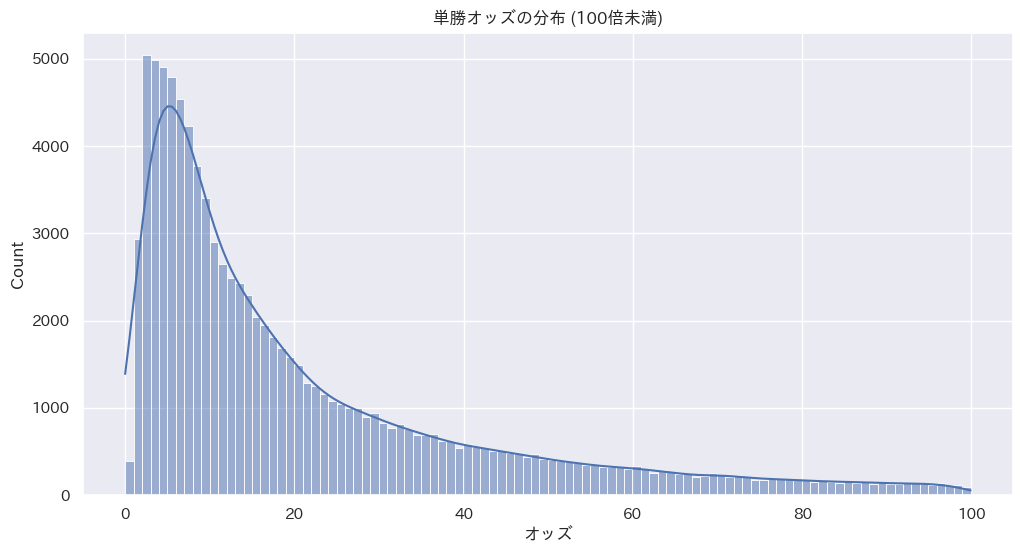

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['odds'] < 100]['odds'], bins=100, kde=True)
plt.title('単勝オッズの分布 (100倍未満)')
plt.xlabel('オッズ')
plt.show()

### 3.3 相関行列
数値特徴量と着順（Rank）の相関を確認します。

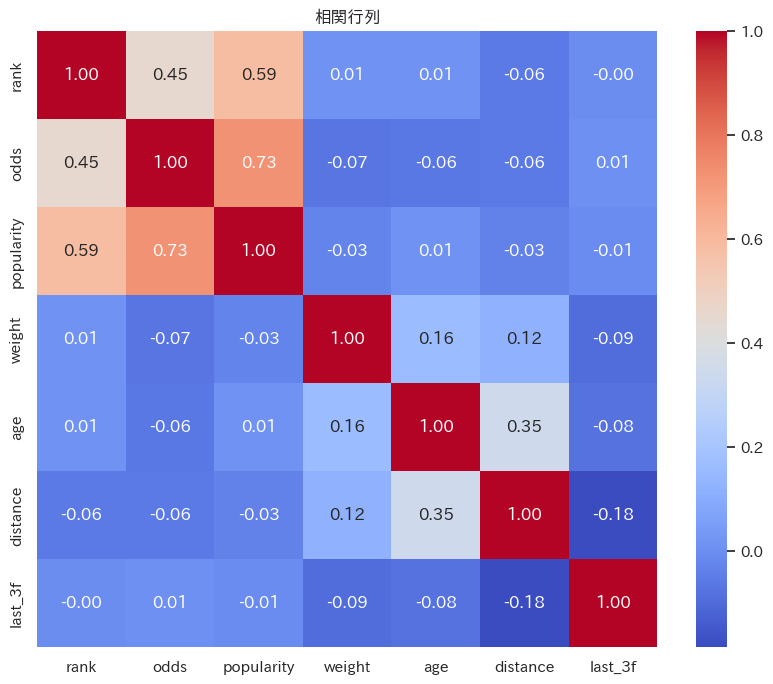

In [14]:
plt.figure(figsize=(10, 8))
numeric_cols = ['rank', 'odds', 'popularity', 'weight', 'age', 'distance', 'last_3f']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('相関行列')
plt.show()